In [6]:
#Import the necessary libraries

import os
import py2exe
import pickle
import pathlib
import webbrowser
import matplotlib
import numpy as np
import pandas as pd
import tkinter as tk
import seaborn as sns
import pyswarms as ps
from PIL import Image
import tensorflow as tf
from scipy import interp
from pathlib import Path
from itertools import cycle
from sklearn import metrics
from numpy import genfromtxt
from subprocess import Popen
import statsmodels.api as sm
import tkinter.font as tkFont
from scipy.linalg import lstsq
import matplotlib.pyplot as plt
from matplotlib import rcParams
from distutils.core import setup
import tensorflow_probability as tfp
from pykrige.ok import OrdinaryKriging
from tensorflow.keras.layers import Input
from sklearn.metrics import roc_curve, auc
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix
from gplearn.genetic import SymbolicClassifier
from tkinter import ttk, filedialog, messagebox
from sklearn.preprocessing import label_binarize
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import Figure, MultipleLocator
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from tensorflow.keras.models import Model, Sequential, load_model
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score

config = {"font.family":'Times New Roman',  "font.size": 10,}
rcParams.update(config)
tfd = tfp.distributions

In [7]:
#Define the main menu

class Main_menu(tk.Tk):
    def __init__(self):
        super().__init__() 
        self.createWidgets()

    def createWidgets(self):
        self.title('Open stope stability prediction')
        self.columnconfigure(0, minsize=200)
        self.geometry('750x280')
        topframe = tk.Frame(self, height=20)
        topframe.pack(fill="both", expand="yes", side=tk.TOP)
        path = pathlib.Path('__file__').parent.absolute()
        path_main_interface = os.path.join(path, 'Interface.png')
        self.Main_interface_image = tk.PhotoImage(file=path_main_interface)
        Main_interface = tk.Label(topframe, image=self.Main_interface_image)
        Main_interface.place(x=0, y=0, relwidth=1, relheight=1)
        self.menubar = tk.Menu()
        configuration = tk.Menu(self.menubar, tearoff=0)
        configuration.add_command(label="Machine learning model", command=self.config1)
        configuration.add_command(label="GP and Kriging", command=self.config2)
        self.menubar.add_cascade(label="Function selection", menu=configuration)
        self.menubar.add_cascade(label="Quit", command=quit)
        self.config(menu=self.menubar)   
        
    def config1(self):
        self.destroy()
        ML_technology()
        
    def config2(self):
        self.destroy()
        Other_method()  

In [8]:
#Open stope stability prediction based on the optimized MLP classifier

class ML_technology(tk.Tk):
    def __init__(self):
        super().__init__()
        self.createWidgets()
        
    def createWidgets(self):
        self.title('Open stope stability prediction based on the optimized MLP classifier')
        self.columnconfigure(0, minsize=100)
        self.geometry('750x750') 
        global clicked
        clicked = False
        
        fir_font = tkFont.Font(family="Times new roman", size=15, weight="normal")
        sec_font = tkFont.Font(family="Times new roman", size=14, weight="normal")
        sec_font2 = tkFont.Font(family="Times new roman", size=14, weight="normal")   
        thi_font = tkFont.Font(family="Times new roman", size=27, weight="bold")
        fou_font = tkFont.Font(family="Times new roman", size=16, weight="normal")
        fiv_font = tkFont.Font(family="Times new roman", size=15, weight="normal")
        
        topframe = tk.Frame(self, height=80)
        topframe.pack(fill="both", expand="yes", side=tk.TOP)
        inputframe = tk.Frame(self, height=60)
        inputframe.pack(fill="both", expand="yes", side=tk.TOP)
        predictframe = tk.Frame(self, height=80)
        predictframe.pack(fill="both", expand="yes", side=tk.TOP)
        Visualizationframe = tk.Frame(self, height=80)
        Visualizationframe.pack(fill="both", expand="yes", side=tk.TOP)
        
        labelframe1 = tk.LabelFrame(topframe, font=fir_font,background="#C0C0C0")
        labelframe1.pack(side=tk.LEFT, fill=tk.Y, expand="yes")
        labelframe2 = tk.LabelFrame(inputframe, text="Initialization", font=fir_font,background="#F0FFF0")
        labelframe2.pack(side=tk.LEFT, fill=tk.Y, expand="yes")
        labelframe3 = tk.LabelFrame(inputframe, text="Training performance", font=fir_font,background="#F0FFF0")
        labelframe3.pack(side=tk.LEFT, fill=tk.Y, expand="yes")
        labelframe4 = tk.LabelFrame(inputframe, text="Test performance", font=fir_font,background="#F0FFF0")
        labelframe4.pack(side=tk.LEFT, fill=tk.Y, expand="yes")
        labelframe5 = tk.LabelFrame(predictframe, text="Input feature", font=fir_font,background="#FFFACD")
        labelframe5.pack(side=tk.LEFT, fill=tk.Y, expand="yes")
        labelframe6 = tk.LabelFrame(predictframe, text="Stability level", font=fir_font,background="#FFFACD")
        labelframe6.pack(side=tk.LEFT, fill=tk.Y, expand="yes")
        labelframe7 = tk.LabelFrame(Visualizationframe, text="Out the ROC curve", font=fiv_font,background="#F0FFF0")
        labelframe7.pack(side=tk.LEFT, fill=tk.Y, expand="yes")
        labelframe8 = tk.LabelFrame(Visualizationframe, text="Update the stability graph", font=fiv_font,background="#F0FFF0")
        labelframe8.pack(side=tk.LEFT, fill=tk.Y, expand="yes")
        
        self.entryvar = tk.StringVar()
        tk.Label(labelframe1, text='Path：', font=fir_font).grid(row=0, column=0, sticky=tk.W)
        tk.Entry(labelframe1, width=32,bd=4,textvariable=self.entryvar).grid(row=0, column=1)
        tk.Button(labelframe1, command=self.__openfile, text='Dataset loading', font=fir_font). \
            grid(row=0, column=2, padx=10, pady=10)
        tk.Button(labelframe1, command=self.Training, text='Modeling', font=fir_font) \
            .grid(row=0, column=3, padx=10, pady=10)
        tk.Button(labelframe1, command=self.Predict, text='Predict', font=fir_font) \
            .grid(row=0, column=4, padx=10, pady=10)
        tk.Button(labelframe1, command=self.Main_interface, text='Quit', font=fir_font) \
            .grid(row=0, column=5, padx=10, pady=10)
        
        self.MLP_Test_size_Parameter = tk.StringVar()
        self.MLP_Validation_size_Parameter = tk.StringVar()
        self.MLP_hidden_layer_sizes_Parameter = tk.StringVar()
        self.MLP_alpha_Parameter = tk.StringVar()
        self.MLP_Random_State_Parameter = tk.StringVar()
        
        ent_Test_size=tk.Entry(labelframe2, width=14, textvariable=self.MLP_Test_size_Parameter, validate='key', fg='gray', font=sec_font)
        ent_Test_size.grid(row=1, column=2, padx=4, pady=5)
        ent_Test_size.insert(0, '0.20')
        self.Default_hint(ent_Test_size)
        ent_hidden_layer_sizes=tk.Entry(labelframe2, width=14, textvariable=self.MLP_hidden_layer_sizes_Parameter, validate='key', fg='gray', font=sec_font)
        ent_hidden_layer_sizes.grid(row=2, column=2, padx=4, pady=5)
        ent_hidden_layer_sizes.insert(0, '106')
        self.Default_hint(ent_hidden_layer_sizes)
        ent_alpha=tk.Entry(labelframe2, width=14, textvariable=self.MLP_alpha_Parameter, validate='key', fg='gray', font=sec_font)
        ent_alpha.grid(row=3, column=2, padx=4, pady=5)
        ent_alpha.insert(0, '0.09086556279101839')
        self.Default_hint(ent_alpha)
        ent_MLP_Random_State=tk.Entry(labelframe2, width=14, textvariable=self.MLP_Random_State_Parameter, validate='key', fg='gray', font=sec_font)
        ent_MLP_Random_State.grid(row=4, column=2, padx=4, pady=5)
        ent_MLP_Random_State.insert(0, '0')
        self.Default_hint(ent_MLP_Random_State)
        
        lab_Test_size=tk.Label(labelframe2, text='Dataset split ratio', font=sec_font)
        lab_Test_size.grid(row=1, column=1, sticky='w', padx=4, pady=5)
        self.CreateToolTip(lab_Test_size,text='The proportion of test sets in the input data set')
        lab_hidden_layer_sizes=tk.Label(labelframe2, text='Hidden layer sizes', font=sec_font)
        lab_hidden_layer_sizes.grid(row=2, column=1, sticky='w', padx=4, pady=5)
        self.CreateToolTip(lab_hidden_layer_sizes, text='The number of neurons in each hidden layer of a neural network')
        lab_alpha=tk.Label(labelframe2, text='Parameter alpha', font=sec_font)
        lab_alpha.grid(row=3, column=1, sticky='w', padx=4, pady=5)
        self.CreateToolTip(lab_alpha, text='Affects the complexity of the model')
        lab_MLP_Random_State=tk.Label(labelframe2, text='Random number', font=sec_font)
        lab_MLP_Random_State.grid(row=4, column=1, sticky='w', padx=4, pady=5)
        self.CreateToolTip(lab_MLP_Random_State, text='The number of random seeds in the MLP model')
        
        self.ACC_train = tk.StringVar()
        self.PRE_train = tk.StringVar()
        self.REC_train = tk.StringVar()
        self.ACC_test = tk.StringVar()
        self.PRE_test = tk.StringVar()
        self.REC_test = tk.StringVar()
        
        tk.Entry(labelframe3, width=12, textvariable=self.ACC_train, validate='key', state=tk.DISABLED, font=sec_font2).grid(row=1,column=5, padx=5, pady=10)
        tk.Entry(labelframe3, width=12, textvariable=self.PRE_train, validate='key', state=tk.DISABLED, font=sec_font2).grid(row=2,column=5, padx=5, pady=10)
        tk.Entry(labelframe3, width=12, textvariable=self.REC_train, validate='key', state=tk.DISABLED, font=sec_font2).grid(row=3, column=5, padx=5, pady=10)

        tk.Label(labelframe3, text='Accuracy', font=sec_font).grid(row=1, column=4, sticky='w', padx=5, pady=10)
        tk.Label(labelframe3, text='Precision', font=sec_font).grid(row=2, column=4, sticky='w', padx=5, pady=10)
        tk.Label(labelframe3, text='Recall', font=sec_font).grid(row=3, column=4, sticky='w', padx=5, pady=10)
        
        tk.Entry(labelframe4, width=12, textvariable=self.ACC_test, validate='key', state=tk.DISABLED, font=sec_font2).grid(row=1,column=6, padx=5, pady=10)
        tk.Entry(labelframe4, width=12, textvariable=self.PRE_test, validate='key', state=tk.DISABLED, font=sec_font2).grid(row=2,column=6, padx=5, pady=10)
        tk.Entry(labelframe4, width=12, textvariable=self.REC_test, validate='key', state=tk.DISABLED, font=sec_font2).grid(row=3, column=6, padx=5, pady=10)

        tk.Label(labelframe4, text='Accuracy', font=sec_font).grid(row=1, column=5, sticky='w', padx=5, pady=10)
        tk.Label(labelframe4, text='Precision', font=sec_font).grid(row=2, column=5, sticky='w', padx=5, pady=10)
        tk.Label(labelframe4, text='Recall', font=sec_font).grid(row=3, column=5, sticky='w', padx=5, pady=10)

        self.Q_Input = tk.StringVar()
        self.Jn_Input = tk.StringVar()
        self.Ja_Input = tk.StringVar()
        self.A_Input = tk.StringVar()
        self.B_Input = tk.StringVar()
        self.C_Input = tk.StringVar()
        self.HR_Input = tk.StringVar()
        self.N_Input = tk.StringVar()
        self.MLP_Stability_Degree = tk.StringVar()
        
        ent1=tk.Entry(labelframe5, textvariable=self.Q_Input, validate='key', bg='#FFDEAD',width=4,bd=4, font=fou_font,justify='center')
        ent1.grid(row=1, column=2, padx=5, pady=5)
        self.Default_hint(ent1)
        ent2=tk.Entry(labelframe5,  textvariable=self.Jn_Input, validate='key', bg='#FFDEAD',width=4,bd=4,font=fou_font,justify='center')
        ent2.grid(row=2, column=2, padx=5, pady=5)
        self.Default_hint(ent2)
        ent3=tk.Entry(labelframe5, textvariable=self.Ja_Input, validate='key', bg='#FFDEAD',width=4,bd=4, font=fou_font,justify='center')
        ent3.grid(row=1, column=4, padx=5, pady=5)
        self.Default_hint(ent3)
        ent4=tk.Entry(labelframe5,  textvariable=self.A_Input, validate='key', bg='#FFDEAD',width=4,bd=4,font=fou_font,justify='center')
        ent4.grid(row=2, column=4, padx=5, pady=5)
        self.Default_hint(ent4)
        ent5=tk.Entry(labelframe5, textvariable=self.B_Input, validate='key', bg='#FFDEAD',width=4,bd=4, font=fou_font,justify='center')
        ent5.grid(row=1, column=6, padx=5, pady=5)
        self.Default_hint(ent5)
        ent6=tk.Entry(labelframe5,  textvariable=self.C_Input, validate='key', bg='#FFDEAD',width=4,bd=4,font=fou_font,justify='center')
        ent6.grid(row=2, column=6, padx=5, pady=5)
        self.Default_hint(ent6)
        ent7=tk.Entry(labelframe5, textvariable=self.HR_Input, validate='key', bg='#FFDEAD',width=4,bd=4, font=fou_font,justify='center')
        ent7.grid(row=1, column=8, padx=5, pady=5)
        self.Default_hint(ent7)
        ent8=tk.Entry(labelframe5,  textvariable=self.N_Input, validate='key', bg='#FFDEAD',width=4,bd=4,font=fou_font,justify='center')
        ent8.grid(row=2, column=8, padx=5, pady=5)
        self.Default_hint(ent8)
        
        lab1=tk.Label(labelframe5, text='Q`', font=fou_font,bg='#FFDEAD')
        lab1.grid(row=1, column=1, sticky='e', padx=4, pady=5)
        self.CreateToolTip(lab1,text='Q´ represents the modified NGI Q classification index value')
        lab2=tk.Label(labelframe5, text='Jn', font=fou_font,bg='#FFDEAD')
        lab2.grid(row=2, column=1, sticky='e', padx=4, pady=5)
        self.CreateToolTip(lab2,text='Joint set number')
        lab3=tk.Label(labelframe5, text='Ja', font=fou_font,bg='#FFDEAD')
        lab3.grid(row=1, column=3, sticky='e', padx=4, pady=5)
        self.CreateToolTip(lab3,text='Joint alteration number')
        lab4=tk.Label(labelframe5, text='A', font=fou_font,bg='#FFDEAD')
        lab4.grid(row=2, column=3, sticky='e', padx=4, pady=5)
        self.CreateToolTip(lab4,text='Ratio of the unconfined compressive strength of the intact rock to the induced compressive stress parallel to the stope face')
        lab5=tk.Label(labelframe5, text='B', font=fou_font,bg='#FFDEAD')
        lab5.grid(row=1, column=5, sticky='e', padx=4, pady=5)
        self.CreateToolTip(lab5,text='Orientation adjustment factor')
        lab6=tk.Label(labelframe5, text='C', font=fou_font,bg='#FFDEAD')
        lab6.grid(row=2, column=5, sticky='e', padx=4, pady=5)
        self.CreateToolTip(lab6,text='Gravity adjustment factor')
        lab7=tk.Label(labelframe5, text='HR', font=fou_font,bg='#FFDEAD')
        lab7.grid(row=1, column=7, sticky='e', padx=4, pady=5)
        self.CreateToolTip(lab7,text='Ratio of surface area to surface circumference of exposed surface of stope')
        lab8=tk.Label(labelframe5, text='N', font=fou_font,bg='#FFDEAD')
        lab8.grid(row=2, column=7, sticky='e', padx=4, pady=5)
        self.CreateToolTip(lab8, text='A comprehensive index used to evaluate the stability of rock mass under given stress conditions')

        tk.Entry(labelframe6, width=16, textvariable=self.MLP_Stability_Degree, validate='key', state=tk.DISABLED,font=thi_font,justify='center').grid(row=1, column=4, padx=20, pady=20) 

        self.MLP_fig1 = Figure(figsize=(3.1, 3.3), dpi=100,frameon=True,edgecolor = "#FFF5EE")  # weight*height
        self.MLP_canvas1 = FigureCanvasTkAgg(self.MLP_fig1, master=labelframe7)
        self.MLP_canvas1.get_tk_widget().grid(column = 1, row = 1)
        self.MLP_canvas1._tkcanvas.pack(side=tk.TOP, fill=tk.X, expand=1)
        self.MLP_fig2 = Figure(figsize=(4, 3.3), dpi=100,frameon=True,edgecolor = "#FFF5EE")
        self.MLP_canvas2 = FigureCanvasTkAgg(self.MLP_fig2, master=labelframe8)
        self.MLP_canvas2.get_tk_widget().grid(column = 1, row = 1)
        self.MLP_canvas2._tkcanvas.pack(side=tk.TOP, fill=tk.X, expand=1)
        self.MLP_ax1 = self.MLP_fig1.add_subplot(111)
        self.MLP_fig1.tight_layout(h_pad=2,w_pad=2)
        self.MLP_ax2 = self.MLP_fig2.add_subplot(111)
        self.MLP_fig2.tight_layout(h_pad=2,w_pad=2)


    def Main_interface(self):
        self.destroy()
        Main_menu()

    def Default_hint(self, widget):
        global clicked
        def hint(event):
            if (clicked == False):
                widget.delete(0, tk.END)
                widget.config(fg="black")
        widget.bind("<Button-1>", hint)

    def CreateToolTip(self, widget, text):
        toolTip = ToolTip(widget)
        def enter(event):
            toolTip.showtip(text)
        def leave(event):
            toolTip.hidetip()
        widget.bind('<Enter>', enter)
        widget.bind('<Leave>', leave)

    def __openfile(self):
        self.filename = filedialog.askopenfilename(title='open csv file', filetype=[('csv', '*.csv')])
        self.entryvar.set(self.filename)
        if not self.filename:
            messagebox.showwarning('Warning', message='File not yet selected！')

    def Training(self):
        dataset = pd.read_csv(self.filename) 
        MLP_Test_size=float(self.MLP_Test_size_Parameter.get())
        MLP_hidden_layer_sizes=int(self.MLP_hidden_layer_sizes_Parameter.get())
        MLP_alpha=float(self.MLP_alpha_Parameter.get())
        MLP_Random_State=int(self.MLP_Random_State_Parameter.get())
        np.random.seed(MLP_Random_State)
        X=dataset.iloc[:,0:8]
        y=dataset.iloc[:,8] 
        X_Boundary=dataset.iloc[:,6:8]
        y_Boundary=dataset.iloc[:,8] 
        X_Train, X_test, y_Train, y_test = train_test_split(X,y,test_size=MLP_Test_size)
        X_train, X_val, y_train, y_val = train_test_split(X_Train, y_Train,test_size=MLP_Test_size)
        X_train_Boundary, X_test_Boundary, y_train_Boundary, y_test_Boundary = train_test_split(X_Boundary, y_Boundary, test_size=MLP_Test_size)
        X_train_Boundary, X_val_Boundary, y_train_Boundary, y_val_Boundary = train_test_split(X_train_Boundary, y_train_Boundary, test_size=MLP_Test_size)
        self.MLP_n_samples, self.MLP_n_features = X.shape
        np.random.seed(MLP_Random_State)
        MLP_model = MLPClassifier(hidden_layer_sizes=int(MLP_hidden_layer_sizes,), activation='relu', solver='adam',
                                        alpha=MLP_alpha,batch_size='auto', learning_rate='constant',learning_rate_init=0.001,
                                        power_t=0.5, max_iter=2000, shuffle=False,random_state=None,tol=1e-4, verbose=False, warm_start=False,
                                        momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1,
                                        beta_1=0.9, beta_2=0.999, epsilon=1e-8, n_iter_no_change=10,)
        MLP_model.fit(X_train, y_train)
        MLP_model_Boundary = MLPClassifier(hidden_layer_sizes=int(MLP_hidden_layer_sizes,), activation='relu', solver='adam',
                                        alpha=MLP_alpha,batch_size='auto', learning_rate='constant',learning_rate_init=0.001,
                                        power_t=0.5, max_iter=2000, shuffle=False,random_state=None,tol=1e-4, verbose=False, warm_start=False,
                                        momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1,
                                        beta_1=0.9, beta_2=0.999, epsilon=1e-8, n_iter_no_change=10,)
        MLP_model_Boundary.fit(X_train_Boundary, y_train_Boundary)
        train_PredictY= MLP_model.predict(X_train)
        trainY_True = y_train
        self.MLP_y_true = y_test
        self.MLP_y_proba = MLP_model.predict(X_test)
        test_PredictY = MLP_model.predict(X_test)
        testY_True = y_test
        self.test_result = np.hstack((testY_True, test_PredictY))
        self.MLP_ax2.set_xlabel('Hydraulic Radius (m)',size=12,labelpad = 0.5)
        self.MLP_ax2.set_ylabel('Stability Number, N',size=10,labelpad = 0.5)
        train_ACC = accuracy_score(trainY_True, train_PredictY)
        train_PRE = precision_score(trainY_True, train_PredictY,pos_label=0)
        train_REC = recall_score(trainY_True, train_PredictY,pos_label=0)
        
        test_ACC = accuracy_score(testY_True, test_PredictY)
        test_PRE = precision_score(testY_True, test_PredictY,pos_label=0)
        test_REC = recall_score(testY_True, test_PredictY,pos_label=0)
        self.ACC_train.set(str(train_ACC))
        self.PRE_train.set(str(train_PRE))
        self.REC_train.set(str(train_REC))
        
        self.ACC_test.set(str(test_ACC))
        self.PRE_test.set(str(test_PRE))
        self.REC_test.set(str(test_REC))

        self.MLP_Visualization_ROC(self.MLP_y_true, self.MLP_y_proba,self.MLP_n_samples,self.MLP_n_features)
        MLP_DecisionBoundary_axis=[1, 60, 0.04, 300]
        self.MLP_DecisionBoundary_X0, self.MLP_DecisionBoundary_X1 = np.meshgrid(np.linspace(MLP_DecisionBoundary_axis[0], MLP_DecisionBoundary_axis[1], 1000).reshape(-1, 1),
                                                                                         np.linspace(MLP_DecisionBoundary_axis[2], MLP_DecisionBoundary_axis[3], 5000).reshape(-1, 1),)
        self.MLP_X_grid_matrix = np.c_[self.MLP_DecisionBoundary_X0.ravel(), self.MLP_DecisionBoundary_X1.ravel()]
        self.MLP_y_predict_DecisionBoundary = MLP_model_Boundary.predict(self.MLP_X_grid_matrix)
        self.MLP_y_predict_matrix_DecisionBoundary = self.MLP_y_predict_DecisionBoundary.reshape(self.MLP_DecisionBoundary_X0.shape)
        self.MLP_Visualization_DecisionBoundary(self.MLP_y_predict_matrix_DecisionBoundary,
                                                self.MLP_DecisionBoundary_X0,
                                                self.MLP_DecisionBoundary_X1)
 
    def Predict(self):
        Stability_Graph_Q=float(self.Q_Input.get())
        Stability_Graph_Jn=float(self.Jn_Input.get())
        Stability_Graph_Ja=float(self.Ja_Input.get())
        Stability_Graph_A=float(self.A_Input.get())
        Stability_Graph_B=float(self.B_Input.get())
        Stability_Graph_C=float(self.C_Input.get())
        Stability_Graph_HR=float(self.HR_Input.get())
        Stability_Graph_N=float(self.N_Input.get())
        dataset = pd.read_csv(self.filename)        
        X=dataset.iloc[:,0:8]
        y=dataset.iloc[:,8] 
        MLP_Test_size=float(self.MLP_Test_size_Parameter.get())
        MLP_Random_State=int(self.MLP_Random_State_Parameter.get())
        np.random.seed(MLP_Random_State)
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=MLP_Test_size)
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,test_size=MLP_Test_size)
        MLP_hidden_layer_sizes=int(self.MLP_hidden_layer_sizes_Parameter.get())
        MLP_alpha=float(self.MLP_alpha_Parameter.get())
        MLP_model = MLPClassifier(hidden_layer_sizes=int(MLP_hidden_layer_sizes,), activation='relu', solver='adam',
                                        alpha=MLP_alpha,batch_size='auto', learning_rate='constant',learning_rate_init=0.001,
                                        power_t=0.5, max_iter=2000, shuffle=False,random_state=None,tol=1e-4, verbose=False, warm_start=False,
                                        momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1,
                                        beta_1=0.9, beta_2=0.999, epsilon=1e-8, n_iter_no_change=10,)
        MLP_model.fit(X_train, y_train)
        train_PredictY= MLP_model.predict(X_train)
        new_feature=[Stability_Graph_Q,Stability_Graph_Jn,Stability_Graph_Ja,Stability_Graph_A,
                     Stability_Graph_B,Stability_Graph_C,Stability_Graph_HR,Stability_Graph_N]
        X_new=np.array([new_feature])
        prediction=MLP_model.predict(X_new)
        if prediction == 0:
            MLP_prediction_category="Stable"
        if prediction == 1:
            MLP_prediction_category="Unstable"
        self.MLP_Stability_Degree.set(MLP_prediction_category)


    def MLP_Visualization_ROC(self, MLP_y_true, MLP_y_proba,MLP_n_samples,MLP_n_features):
        fpr, tpr, threshold = metrics.roc_curve(MLP_y_true, MLP_y_proba)
        roc_auc = metrics.auc(fpr, tpr)
        self.MLP_ax1.plot(fpr, tpr, 'r',label = "AUC = %0.4f" % roc_auc,linewidth=2)
        self.MLP_ax1.plot([0, 1], [0, 1], 'k--', lw=1)
        self.MLP_ax1.set_xlim([-0.05, 1.0])
        self.MLP_ax1.set_ylim([-0.05, 1.05])
        self.MLP_ax1.tick_params(direction='in',which='major',width=1,length=4,pad = 0.9)
        self.MLP_ax1.set_xticks([0,0.2,0.4,0.6,0.8,1])   
        self.MLP_ax1.set_yticks([0,0.2,0.4,0.6,0.8,1])        
        self.MLP_ax1.set_xlabel('FPR', fontsize=12)
        self.MLP_ax1.set_ylabel('TPR', fontsize=12)
        self.MLP_ax1.legend(loc="lower right",fontsize=9,facecolor='cornsilk', edgecolor='blue')
        self.MLP_canvas1.draw()
 
    def MLP_Visualization_DecisionBoundary(self,MLP_y_predict_matrix_DecisionBoundary,MLP_DecisionBoundary_X0,MLP_DecisionBoundary_X1):           
        my_colormap = ListedColormap(['#E6E6FA','#FFFFCC'])
        self.MLP_ax2.contourf(MLP_DecisionBoundary_X0, MLP_DecisionBoundary_X1, MLP_y_predict_matrix_DecisionBoundary,cmap=my_colormap)
        dataset = pd.read_csv(self.filename) 
        class_0 = dataset[dataset['Stability'] == 0]
        class_1 = dataset[dataset['Stability'] == 1]
        self.MLP_ax2.tick_params(direction='in',which='major',width=1,length=4,pad = 0.7)
        self.MLP_ax2.tick_params(direction='in',which='minor',width=1,length=2,pad = 0.7)
        self.MLP_ax2.scatter(class_0['HR'], class_0['N'], color="#0000FF", label='Class 0',s = 5)
        self.MLP_ax2.scatter(class_1['HR'], class_1['N'], color="#B22222", label='Class 1',s = 5)
        self.MLP_ax2.set_xscale('log')
        self.MLP_ax2.set_yscale('log')
        self.MLP_ax2.set_xlabel('Hydraulic Radius (m)',size=12 ,labelpad = 0.5)
        self.MLP_ax2.set_ylabel('Stability Number, N',size=10, labelpad = 0.5)
        self.MLP_canvas2.draw()  
        
class ToolTip(object):
    def __init__(self, widget):
        self.widget = widget
        self.tipwindow = None
        self.id = None
        self.x = self.y = 0

    def showtip(self, text):
        self.text = text
        if self.tipwindow or not self.text:
            return
        x, y, cx, cy = self.widget.bbox("insert")
        x = x + self.widget.winfo_rootx() + 20
        y = y + cy + self.widget.winfo_rooty() +20
        self.tipwindow = tw = tk.Toplevel(self.widget)
        tw.wm_overrideredirect(1)
        tw.wm_geometry("+%d+%d" % (x, y))
        label = tk.Label(tw, text=self.text, justify=tk.LEFT,
                      background="#ffffe0", relief=tk.SOLID, borderwidth=1,
                      font=("tahoma", "8", "normal"))
        label.pack(ipadx=1)

    def hidetip(self):
        tw = self.tipwindow
        self.tipwindow = None
        if tw:
            tw.destroy()

In [9]:
#Auxiliary analysis technologies based on GP and Kriging

class Other_method(tk.Tk):
    def __init__(self):
        super().__init__()
        self.createWidgets()

    def createWidgets(self):
        self.title('Open stope stability prediction expression based on genetic programming (GP)')
        self.columnconfigure(0, minsize=100)
        self.geometry('750x780') 
        global clicked
        clicked = False
        fir_font = tkFont.Font(family="Times new roman", size=15, weight="normal")
        sec_font = tkFont.Font(family="Times new roman", size=14, weight="normal")
        thi_font = tkFont.Font(family="Times new roman", size=17, weight="bold")
        fou_font = tkFont.Font(family="Times new roman", size=17, weight="normal")
        fiv_font = tkFont.Font(family="Times new roman", size=15, weight="bold")
        
        Firstframe = tk.Frame(self, height=80)
        Firstframe.pack(fill="both", expand="yes", side=tk.TOP)
        Firstframe2 = tk.Frame(self, height=80)
        Firstframe2.pack(fill="both", expand="yes", side=tk.TOP)
        Secondframe = tk.Frame(self, height=80)
        Secondframe.pack(fill="both", expand="yes", side=tk.TOP)
        Secondframe2 = tk.Frame(self, height=80)
        Secondframe2.pack(fill="both", expand="yes", side=tk.TOP)
        Thirdframe = tk.Frame(self, height=80)
        Thirdframe.pack(fill="both", expand="yes", side=tk.TOP)
        Fouthframe = tk.Frame(self, height=80)
        Fouthframe.pack(fill="both", expand="yes", side=tk.TOP)
        
        labelframe1 = tk.LabelFrame(Firstframe, font=fir_font,background="#C0C0C0")
        labelframe1.pack(side=tk.LEFT, fill=tk.Y, expand="yes")
        labelframe2 = tk.LabelFrame(Firstframe2, text="GP parameter setting", font=fir_font,background="#F0FFF0")
        labelframe2.pack(side=tk.LEFT, fill=tk.Y, expand="yes")
        labelframe3 = tk.LabelFrame(Firstframe2, text="Test performance", font=fir_font,background="#F0FFF0")
        labelframe3.pack(side=tk.LEFT, fill=tk.Y, expand="yes")
        labelframe4 = tk.LabelFrame(Secondframe, text="GP expression", font=fir_font,background="#FFFACD")
        labelframe4.pack(side=tk.LEFT, fill=tk.Y, expand="yes")
        labelframe5 = tk.LabelFrame(Secondframe2, text="Calculate the probability of instability", font=fir_font,background="#FFFACD")
        labelframe5.pack(side=tk.LEFT, fill=tk.Y, expand="yes")
        labelframe6 = tk.LabelFrame(Thirdframe, font=fir_font,background="#C0C0C0")
        labelframe6.pack(side=tk.LEFT, fill=tk.Y, expand="yes")   
        labelframe7 = tk.LabelFrame(Fouthframe,text="Kriging interpolation graph", font=fir_font,background="#FFFACD")
        labelframe7.pack(side=tk.LEFT, fill=tk.Y, expand="yes")  
        
        self.GP_entryvar = tk.StringVar()
        tk.Label(labelframe1, text='Path：', font=fir_font).grid(row=0, column=0, sticky=tk.W)
        tk.Entry(labelframe1, width=35,bd=4,textvariable=self.GP_entryvar).grid(row=0, column=1)
        tk.Button(labelframe1, command=self.GP_openfile, text='Dataset loading', font=fir_font). \
            grid(row=0, column=2, padx=13, pady=5)
        tk.Button(labelframe1,text='Modeling of GP',command=self.GP_Stope_Prediction, font=fir_font) \
            .grid(row=0, column=3, padx=13, pady=5)
        tk.Button(labelframe1, command=self.Main_interface, text='Quit', font=fir_font) \
            .grid(row=0, column=4, padx=13, pady=5)

        self.EST_population_size_Parameter = tk.StringVar()
        self.EST_generations_Parameter = tk.StringVar()
        self.EST_PCrossover_Parameter = tk.StringVar()
        self.EST_PSubtreeMutation_Parameter = tk.StringVar()
        self.EST_PHoistMutation_Parameter = tk.StringVar()
        self.EST_PPointMutation_Parameter = tk.StringVar()
        self.EST_RandomNumber_Parameter = tk.StringVar()
        self.EST_MaxSamples_Parameter = tk.StringVar()
        self.EST_StoppingCriteria_Parameter = tk.StringVar()
        
        ent_EST_population_size=tk.Entry(labelframe2, width=5, textvariable=self.EST_population_size_Parameter, validate='key', fg='gray', font=sec_font)
        ent_EST_population_size.grid(row=1, column=2, padx=3, pady=4)
        ent_EST_population_size.insert(0, '0')
        self.Default_hint(ent_EST_population_size)
        ent_EST_generations=tk.Entry(labelframe2, width=5, textvariable=self.EST_generations_Parameter, validate='key', fg='gray', font=sec_font)
        ent_EST_generations.grid(row=2, column=2, padx=3, pady=4)
        ent_EST_generations.insert(0, '0')
        self.Default_hint(ent_EST_generations)
        ent_EST_PCrossover=tk.Entry(labelframe2, width=5, textvariable=self.EST_PCrossover_Parameter, validate='key', fg='gray', font=sec_font)
        ent_EST_PCrossover.grid(row=3, column=2, padx=3, pady=4)
        ent_EST_PCrossover.insert(0, '0')
        self.Default_hint(ent_EST_PCrossover)
        ent_EST_PSubtreeMutation=tk.Entry(labelframe2, width=5, textvariable=self.EST_PSubtreeMutation_Parameter, validate='key', fg='gray', font=sec_font)
        ent_EST_PSubtreeMutation.grid(row=1, column=4, padx=3, pady=4)
        ent_EST_PSubtreeMutation.insert(0, '0')
        self.Default_hint(ent_EST_PSubtreeMutation)
        ent_EST_PHoistMutation=tk.Entry(labelframe2, width=5, textvariable=self.EST_PHoistMutation_Parameter, validate='key', fg='gray', font=sec_font)
        ent_EST_PHoistMutation.grid(row=2, column=4, padx=3, pady=4)
        ent_EST_PHoistMutation.insert(0, '0')
        self.Default_hint(ent_EST_PHoistMutation)
        ent_EST_PPointMutation=tk.Entry(labelframe2, width=5, textvariable=self.EST_PPointMutation_Parameter, validate='key', fg='gray', font=sec_font)
        ent_EST_PPointMutation.grid(row=3, column=4, padx=3, pady=4)
        ent_EST_PPointMutation.insert(0, '0')
        self.Default_hint(ent_EST_PPointMutation)
        ent_EST_RandomNumber=tk.Entry(labelframe2, width=5, textvariable=self.EST_RandomNumber_Parameter, validate='key', fg='gray', font=sec_font)
        ent_EST_RandomNumber.grid(row=1, column=6, padx=3, pady=4)
        ent_EST_RandomNumber.insert(0, '0')
        self.Default_hint(ent_EST_RandomNumber)
        ent_EST_MaxSamples=tk.Entry(labelframe2, width=5, textvariable=self.EST_MaxSamples_Parameter, validate='key', fg='gray', font=sec_font)
        ent_EST_MaxSamples.grid(row=2, column=6, padx=3, pady=4)
        ent_EST_MaxSamples.insert(0, '0')
        self.Default_hint(ent_EST_MaxSamples)
        ent_EST_StoppingCriteria=tk.Entry(labelframe2, width=5, textvariable=self.EST_StoppingCriteria_Parameter, validate='key', fg='gray', font=sec_font)
        ent_EST_StoppingCriteria.grid(row=3, column=6, padx=3, pady=4)
        ent_EST_StoppingCriteria.insert(0, '0') 
        self.Default_hint(ent_EST_StoppingCriteria)
        
        self.Default_hint(ent_EST_PPointMutation)
        lab_EST_population_size=tk.Label(labelframe2, text='Population', font=sec_font)
        lab_EST_population_size.grid(row=1, column=1, sticky='w', padx=4, pady=4)
        lab_EST_generations=tk.Label(labelframe2, text='Iterations', font=sec_font)
        lab_EST_generations.grid(row=2, column=1, sticky='w', padx=4, pady=4)
        lab_EST_PCrossover=tk.Label(labelframe2, text='Crossover', font=sec_font)
        lab_EST_PCrossover.grid(row=3, column=1, sticky='w', padx=4, pady=4)
        lab_EST_PSubtreeMutation=tk.Label(labelframe2, text='Subtree mutation', font=sec_font)
        lab_EST_PSubtreeMutation.grid(row=1, column=3, sticky='w', padx=4, pady=4)
        lab_EST_PHoistMutation=tk.Label(labelframe2, text='Hoist mutation', font=sec_font)
        lab_EST_PHoistMutation.grid(row=2, column=3, sticky='w', padx=4, pady=4)
        lab_EST_PPointMutation=tk.Label(labelframe2, text='Point mutation', font=sec_font)
        lab_EST_PPointMutation.grid(row=3, column=3, sticky='w', padx=4, pady=4)
        lab_EST_RandomNumber=tk.Label(labelframe2, text='Random number', font=sec_font)
        lab_EST_RandomNumber.grid(row=1, column=5, sticky='w', padx=4, pady=4)
        lab_EST_MaxSamples=tk.Label(labelframe2, text='Max samples', font=sec_font)
        lab_EST_MaxSamples.grid(row=2, column=5, sticky='w', padx=4, pady=4)
        lab_EST_StoppingCriteria=tk.Label(labelframe2, text='Stopping criteria', font=sec_font)
        lab_EST_StoppingCriteria.grid(row=3, column=5, sticky='w', padx=4, pady=4)
        
        self.ACC_Display_GP = tk.StringVar()
        self.PRE_Display_GP = tk.StringVar()
        self.REC_Display_GP = tk.StringVar()
        
        tk.Entry(labelframe3, width=8, textvariable=self.ACC_Display_GP, validate='key', state=tk.DISABLED, font=sec_font).grid(row=1,column=5, padx=4, pady=4)        
        tk.Entry(labelframe3, width=8, textvariable=self.PRE_Display_GP, validate='key', state=tk.DISABLED, font=sec_font).grid(row=2,column=5, padx=4, pady=4)
        tk.Entry(labelframe3, width=8, textvariable=self.REC_Display_GP, validate='key', state=tk.DISABLED, font=sec_font).grid(row=3, column=5, padx=4, pady=4)
 
        tk.Label(labelframe3, text='Accuracy', font=sec_font).grid(row=1, column=4, sticky='w', padx=5, pady=4)
        tk.Label(labelframe3, text='Precision', font=sec_font).grid(row=2, column=4, sticky='w', padx=5, pady=4)
        tk.Label(labelframe3, text='Recall', font=sec_font).grid(row=3, column=4, sticky='w', padx=5, pady=4)  
        
        tk.Label(labelframe4,text='Y(HR, N)=',font=fiv_font).grid(row=0, column=0, sticky=tk.W,padx=6, pady=4)
        self.GP_Expression_Output = tk.StringVar()        
        tk.Entry(labelframe4, width=50, textvariable=self.GP_Expression_Output, validate='key',
                 state=tk.DISABLED,font=thi_font,justify='center').grid(row=0, column=2, padx=6, pady=10)
        Expression_path = pathlib.Path('__file__').parent.absolute()
        path_expression = os.path.join(Expression_path, 'Criterion.png')
        self.Expression_image = tk.PhotoImage(file=path_expression)
        self.Expression_image = self.Expression_image.subsample(1, 1)
        Expression_Y1Y2 = tk.Label(labelframe5, image=self.Expression_image).grid(row=0, column=0, sticky=tk.W,padx=4, pady=5)
        
        self.Kriging_entryvar = tk.StringVar()
        tk.Label(labelframe6, text='Path：', font=fir_font).grid(row=0, column=0, sticky=tk.W)
        tk.Entry(labelframe6, width=35,bd=4,textvariable=self.Kriging_entryvar).grid(row=0, column=1)
        tk.Button(labelframe6, command=self.Kriging_openfile, text='Dataset loading', font=fir_font). \
            grid(row=0, column=2, padx=8, pady=10)
        tk.Button(labelframe6, command=self.MSG_Kriging_GenerateGraph,text='Modeling of Kriging', font=fir_font) \
            .grid(row=0, column=3, padx=8, pady=10)
        tk.Button(labelframe6, command=self.Main_interface, text='Quit', font=fir_font) \
            .grid(row=0, column=4, padx=8, pady=10)
   
        self.Kriging_fig = Figure(figsize=(7.3, 3.3), dpi=100,frameon=True,edgecolor = "#FFF5EE")  # weight*height
        self.Kriging_canvas = FigureCanvasTkAgg(self.Kriging_fig, master=labelframe7)
        self.Kriging_canvas.get_tk_widget().grid(column = 1, row = 1)
        self.Kriging_canvas._tkcanvas.pack(side=tk.TOP, fill=tk.X, expand=1)
        self.Kriging_ax = self.Kriging_fig.add_subplot(111)
        self.Kriging_fig.tight_layout(h_pad=2,w_pad=2)

    def GP_Stope_Prediction(self):
        self.MSG_GP_Expression()        

    def Main_interface(self):
        self.destroy()
        Main_menu()

    def Default_hint(self, widget):
        global clicked
        def hint(event):
            if (clicked == False):
                widget.delete(0, tk.END)
                widget.config(fg="black")
        widget.bind("<Button-1>", hint)

    def CreateToolTip(self, widget, text):
        toolTip = ToolTip(widget)
        def enter(event):
            toolTip.showtip(text)
        def leave(event):
            toolTip.hidetip()
        widget.bind('<Enter>', enter)
        widget.bind('<Leave>', leave)

    def GP_openfile(self):
        self.GP_filename = filedialog.askopenfilename(title='open csv file', filetype=[('csv', '*.csv')])
        self.GP_entryvar.set(self.GP_filename)
        if not self.GP_filename:
            messagebox.showwarning('Warning', message='File not yet selected！')
            
    def Kriging_openfile(self):
        self.Kriging_filename = filedialog.askopenfilename(title='open csv file', filetype=[('csv', '*.csv')])
        self.Kriging_entryvar.set(self.Kriging_filename)
        if not self.Kriging_filename:
            messagebox.showwarning('Warning', message='File not yet selected!')
 
    def MSG_GP_Expression(self):
        df = pd.read_csv(self.GP_filename)
        MSG_GP_x=df.iloc[:,0:2]
        MSG_GP_y=df.iloc[:,2] 
        MSG_EST_population_size=int(self.EST_population_size_Parameter.get())
        MSG_EST_generations=int(self.EST_generations_Parameter.get())
        MSG_EST_PCrossover=float(self.EST_PCrossover_Parameter.get())
        MSG_EST_PSubtreeMutation=float(self.EST_PSubtreeMutation_Parameter.get())
        MSG_EST_PHoistMutation=float(self.EST_PHoistMutation_Parameter.get())
        MSG_EST_PPointMutation=float(self.EST_PPointMutation_Parameter.get())
        MSG_EST_RandomNumber=int(self.EST_RandomNumber_Parameter.get())
        MSG_EST_MaxSamples=float(self.EST_MaxSamples_Parameter.get())
        MSG_StoppingCriteria=float(self.EST_StoppingCriteria_Parameter.get())
        np.random.seed(MSG_EST_RandomNumber)
        MSG_GP_X_train, MSG_GP_X_test, MSG_GP_y_train, MSG_GP_y_test = train_test_split(MSG_GP_x, MSG_GP_y, test_size=0.2)
        MSG_GP_X_train, MSG_GP_X_val, MSG_GP_y_train, MSG_GP_y_val = train_test_split(MSG_GP_X_train, MSG_GP_y_train, test_size=0.2)
        feature_names = ['HR', 'N']
        MSG_est = SymbolicClassifier(population_size=MSG_EST_population_size,generations=MSG_EST_generations, stopping_criteria=MSG_StoppingCriteria,
                                 function_set=('add', 'sub', 'mul', 'div', 'sin', 'tan', 'cos','sqrt','abs','inv'),
                                   p_crossover=MSG_EST_PCrossover, p_subtree_mutation=MSG_EST_PSubtreeMutation,
                                   p_hoist_mutation=MSG_EST_PHoistMutation, p_point_mutation=MSG_EST_PPointMutation,
                                   max_samples=MSG_EST_MaxSamples, verbose=1,
                                   parsimony_coefficient=0.01,feature_names=feature_names)
        MSG_est.fit(MSG_GP_X_train,MSG_GP_y_train)
        MSG_GP_y_pred=MSG_est.predict(MSG_GP_X_test)
        MSG_GP_ACC = accuracy_score(MSG_GP_y_test, MSG_GP_y_pred)
        MSG_GP_PRE = precision_score(MSG_GP_y_test, MSG_GP_y_pred,pos_label=0)
        MSG_GP_REC = recall_score(MSG_GP_y_test, MSG_GP_y_pred,pos_label=0)
   
        self.ACC_Display_GP.set(str(MSG_GP_ACC))
        self.PRE_Display_GP.set(str(MSG_GP_PRE))
        self.REC_Display_GP.set(str(MSG_GP_REC))
        self.GP_Expression_Output.set(MSG_est._program)
        
    def MSG_Kriging_GenerateGraph(self):
        df = pd.read_csv(self.Kriging_filename) 
        data = df.values.tolist()
        data = np.array(data)
        MSG_Kriging_gridx = np.arange(1, 60,1)
        MSG_Kriging_gridy = np.arange(0.04, 300,1)  
        OK = OrdinaryKriging(data[:, 0],data[:, 1],data[:, 2],
                variogram_model="linear",verbose=False,enable_plotting=False)
        my_colormap = ListedColormap(['#E6E6FA','#FFFFCC'])
        MSG_Kriging_z, ss = OK.execute("grid", MSG_Kriging_gridx, MSG_Kriging_gridy)
        MSG_Kriging_X, MSG_Kriging_Y = np.meshgrid(MSG_Kriging_gridx, MSG_Kriging_gridy)
        self.Kriging_ax.pcolor(MSG_Kriging_X, MSG_Kriging_Y, MSG_Kriging_z, cmap=my_colormap)
        self.Kriging_ax.tick_params(direction='in',which='major',width=1,length=4,pad = 0.9)
        self.Kriging_ax.tick_params(direction='in',which='minor',width=1,length=2,pad = 0.9)
        self.Kriging_ax.set_xscale('log')
        self.Kriging_ax.set_yscale('log')
        self.Kriging_ax.set_xlabel('Hydraulic Radius (m)',size=14,labelpad = 0.4)
        self.Kriging_ax.set_ylabel('Stability Number, N',size=14,labelpad = 0.4)
        class_0 = df[df['Stability'] == 0]
        class_1 = df[df['Stability'] == 1]
        plt.scatter(class_0['HR'], class_0['N'], color="#0000FF", label='Class 0')
        plt.scatter(class_1['HR'], class_1['N'], color="#B22222", label='Class 1')
        self.Kriging_canvas.draw()

class ToolTip(object):
    def __init__(self, widget):
        self.widget = widget
        self.tipwindow = None
        self.id = None
        self.x = self.y = 0

    def showtip(self, text):
        self.text = text
        if self.tipwindow or not self.text:
            return
        x, y, cx, cy = self.widget.bbox("insert")
        x = x + self.widget.winfo_rootx() + 20
        y = y + cy + self.widget.winfo_rooty() +20
        self.tipwindow = tw = tk.Toplevel(self.widget)
        tw.wm_overrideredirect(1)
        tw.wm_geometry("+%d+%d" % (x, y))
        label = tk.Label(tw, text=self.text, justify=tk.LEFT,
                      background="#ffffe0", relief=tk.SOLID, borderwidth=1,
                      font=("tahoma", "8", "normal"))
        label.pack(ipadx=1)

    def hidetip(self):
        tw = self.tipwindow
        self.tipwindow = None
        if tw:
            tw.destroy()

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    11.06          3.31298        4         0.593543         0.643191      4.71m
   1     5.25          1.31623        3         0.576891         0.744882      4.58m
   2     3.45         0.994808        3         0.566111         0.538791      4.67m
   3     3.33          1.15587        3         0.525308         0.894355      4.42m
   4     3.37          1.45419        3         0.505989          1.06271      4.30m
   5     3.47          1.61938        3         0.493505           1.1715      4.41m
   6     3.42          1.69113        3         0.478554          1.30179      4.14m
   7     3.34          1.79207        3         0.508307          1.04251      4.43m
   8     3.22          1.81165        3         0.492908           1.1767  

  94     5.58          2.55875        7         0.395297         0.724188      4.70m
  95     5.40          2.38258        7         0.393011         0.744112      4.24m
  96     5.33          2.13008        5          0.39278         0.974038      4.47m
  97     5.39          2.05905        7         0.385339          0.81097      4.69m
  98     5.15          2.12794        7          0.38874         0.781333      4.46m
  99     5.36          2.67658        7         0.379502         0.861838      4.45m
 100     5.40           2.0242        7         0.394043          0.73512      4.45m
 101     5.51          1.56858        7         0.388291         0.785242      4.68m
 102     5.19          2.20357        7         0.398963         0.692244      4.44m
 103     5.18           2.2185        5         0.387076          1.02374      4.43m
 104     5.44          1.78257        7         0.391257         0.759396      4.43m
 105     5.26           2.4588        7         0.396789         

 191     5.04          2.34574        5         0.389171          1.00549      4.00m
 192     4.96          2.75898        5         0.394776         0.956642      3.99m
 193     4.99          2.41232        5         0.380606          1.08013      3.99m
 194     5.05          2.06294        5         0.393786         0.965265      3.98m
 195     5.01           2.6095        5         0.378008          1.10276      4.19m
 196     4.84          2.79772        5         0.392752         0.974282      3.97m
 197     5.24          2.42355        5         0.408511         0.836947      4.18m
 198     5.05          2.48579        5         0.397108         0.936321      4.17m
 199     5.12          2.16824        5         0.396067         0.945388      3.96m
 200     4.98          2.72891        5         0.390961          0.98989      3.95m
 201     5.04          2.17251        5         0.393468         0.968042      4.16m
 202     5.13          2.30977        5         0.385032         

 288     5.92          1.52926        6         0.316165          1.26636      3.97m
 289     6.21           1.4447        6         0.353402         0.883313      4.21m
 290     6.02          1.59891        6         0.327668          1.16612      4.00m
 291     6.04          1.89053        6         0.339585          1.06227      3.85m
 292     6.18          1.43238        6         0.331932          1.12897      3.68m
 293     5.72          1.52487        6         0.310741          1.25507      3.68m
 294     6.06          1.34165        6         0.341428          1.04622      3.67m
 295     6.02          1.58629        6         0.336486          1.08928      3.67m
 296     5.90          1.68571        6         0.342232         0.980651      3.66m
 297     6.08          1.56244        6         0.333752          1.05455      3.66m
 298     6.11          1.33758        6         0.327706          1.10724      3.65m
 299     5.99          1.52025        6         0.330636         

 385     5.94          1.48878        6         0.340418         0.996459      3.66m
 386     6.08          1.43709        6         0.330796          1.08031      3.62m
 387     5.92            1.448        6         0.338111          1.01657      3.46m
 388     6.02            1.704        6         0.328648          1.09903      3.43m
 389     6.12          1.58493        6          0.34084         0.992781      3.81m
 390     5.96            1.419        6         0.342128         0.981559      3.46m
 391     5.95          1.44057        6         0.320804          1.16738      3.73m
 392     5.98          1.67178        6         0.329293          1.09341      3.44m
 393     6.06          1.70776        6         0.334513          1.04792      3.54m
 394     6.00          1.95989        6         0.338331          1.01465      3.31m
 395     5.97          1.35125        6          0.33861          1.01222      3.46m
 396     6.14          1.80302        6         0.341757         

 482     6.01          1.56398        6         0.332374          1.06656      3.10m
 483     6.15          1.55546        6         0.321719          1.15941      2.96m
 484     5.99          1.40434        6         0.335283          1.04121      2.95m
 485     6.15          1.85915        6         0.335792          1.03677      3.08m
 486     6.17          1.32378        6         0.334795          1.04547      2.94m
 487     6.14           1.6634        6         0.347839         0.931795      3.07m
 488     6.17          1.38035        6         0.332007          1.06976      2.93m
 489     5.97          1.82081        6         0.334389            1.049      2.92m
 490     6.22          1.69216        6         0.345826         0.949335      2.92m
 491     6.03          1.52765        6         0.340275         0.997703      2.91m
 492     5.94          1.23763        6         0.336866          1.02741      2.90m
 493     6.13          1.45144        6         0.340914         

 579     6.02          1.33508        6         0.329992          1.08731      2.52m
 580     6.01          1.40285        6         0.329346          1.09294      2.40m
 581     5.96          1.49342        6         0.336211          1.03312      2.39m
 582     6.12          1.45091        6         0.343585         0.968864      2.50m
 583     6.11          1.41195        6         0.324779          1.13274      2.38m
 584     5.99          1.67972        6         0.341701         0.985279      3.03m
 585     6.06          1.71418        6         0.330421          1.08358      2.48m
 586     5.99          1.65181        6         0.333414           1.0575      2.41m
 587     5.98          1.57943        6         0.343533         0.969313      2.56m
 588     6.16          1.47547        6         0.321831          1.15844      2.38m
 589     6.08          1.37261        6         0.349842          0.91434      2.46m
 590     5.90          1.62659        6         0.328437         

 676     6.14          1.54506        6         0.340476         0.995954      2.07m
 677     5.93          1.83299        6         0.331352          1.07546      1.97m
 678     6.10          1.52904        6         0.337989          1.01763      1.92m
 679     5.95          1.74519        6         0.337698          1.02017      2.01m
 680     5.99          1.32635        6         0.334098          1.05154      1.98m
 681     5.91          1.51516        6         0.336194          1.03327      1.97m
 682     6.17          1.48616        6         0.340955         0.991777      1.88m
 683     6.27          1.52913        6         0.342568          1.01587      2.02m
 684     6.14          1.43637        6         0.333622          1.05568      1.87m
 685     5.99          1.68753        6         0.336735          1.02856      1.82m
 686     5.98          1.28922        6         0.329621          1.09055      1.91m
 687     6.11          1.62798        6         0.346635         

 773     5.84          1.74722        6         0.334759          1.04578      1.41m
 774     5.95             1.59        6         0.333098          1.06025      1.36m
 775     6.22          1.61513        6         0.332703          1.06369      1.47m
 776     6.07          1.54706        6         0.334226          1.05042      1.41m
 777     6.10          1.56824        6         0.335895          1.03587      1.44m
 778     6.09          1.27471        6         0.334811          1.04532      1.38m
 779     6.13          1.51168        6         0.358336         0.840318      1.39m
 780     6.03          1.59018        6          0.33572           1.0374      1.37m
 781     6.06          1.23706        6         0.327299          1.11079      1.36m
 782     6.02          1.47557        6         0.337396          1.02279      1.36m
 783     6.00          1.44741        6         0.319125          1.18202      1.29m
 784     6.10          1.49692        6         0.333375         

 870     6.08          1.62324        6         0.348325         0.927561     48.36s
 871     6.04           1.5441        6         0.324552          1.13472     47.99s
 872     6.13          1.42357        6         0.328358          1.04612     49.60s
 873     6.12          1.64858        6         0.326678          1.11619     47.24s
 874     6.03          1.47113        6         0.342642         0.977081     48.81s
 875     6.02          1.68704        6         0.333355          1.05801     46.49s
 876     6.24           1.7601        6          0.34436         0.962106     48.04s
 877     5.97          1.46434        6         0.350788         0.906093     45.74s
 878     5.98          1.46662        6         0.344454         0.961288     47.26s
 879     5.97           1.4344        6         0.335028          1.04343     44.99s
 880     6.09          1.54976        6          0.34125         0.989209     46.48s
 881     6.19          1.54083        6         0.328348         

 967     5.96          1.51609        6         0.325413          1.12722     12.54s
 968     6.02          1.44945        6         0.326659          1.11636     12.11s
 969     6.08          1.55824        6         0.335186          1.04205     11.72s
 970     5.98           1.4072        6         0.329833           1.0887     11.78s
 971     6.02          1.89712        6         0.347222         0.937171     10.93s
 972     6.04          1.52815        6         0.347497         0.934774     13.07s
 973     6.01          1.64755        6         0.299815          1.35029     10.15s
 974     6.18          1.29953        6         0.347633         0.933588      9.76s
 975     5.90          1.66934        6         0.339445          1.00494      9.37s
 976     5.94          1.60659        6         0.356165         0.859236      9.34s
 977     5.87          1.60803        6         0.351454         0.900288      8.59s
 978     6.11          1.13796        6         0.344321         

<ipython-input-9-c0d92c528e7f>:245: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  self.Kriging_ax.pcolor(MSG_Kriging_X, MSG_Kriging_Y, MSG_Kriging_z, cmap=my_colormap)
2024-05-03 21:38:07,151 - numexpr.utils - INFO - Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2024-05-03 21:38:07,151 - numexpr.utils - INFO - NumExpr defaulting to 8 threads.


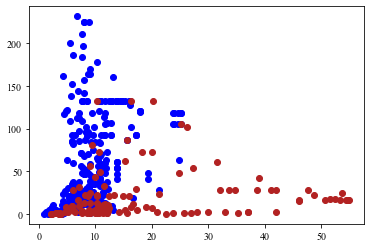

In [10]:
if __name__ == '__main__':
    Main_menu()
    tk.mainloop()